In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df =pd.read_csv("livwell.csv")
df.head()

,country_name,country_code,year,region_num_harmonized,region_name_harmonized,SurveyId,interview_year_mean,interview_month_mean,CMC_interview_mean,DM_age_mean,...,drought_spei03_n1_share36,drought_spei03_n1_share60,drought_spei03_n1.5_share12,drought_spei03_n1.5_share36,drought_spei03_n1.5_share60,drought_spei03_n2_share12,drought_spei03_n2_share36,drought_spei03_n2_share60,hdi,gdp_pc
0,Armenia,ARM,2000,1,Aragatsotn,AM2000DHS,2000.0,11.0,1210.53,30.71,...,0.388889,0.316667,0.333333,0.250000,0.166667,0.083333,0.083333,0.05,0.644083,2938.187500
1,Armenia,ARM,2000,2,Ararat,AM2000DHS,2000.0,11.0,1210.55,30.38,...,0.416667,0.316667,0.333333,0.277778,0.233333,0.083333,0.083333,0.05,0.644127,3053.040283
2,Armenia,ARM,2000,3,Armavir,AM2000DHS,2000.0,10.0,1210.43,31.10,...,0.361111,0.300000,0.333333,0.250000,0.166667,0.083333,0.083333,0.05,0.644415,3003.245605
3,Armenia,ARM,2000,4,Gegharkunik,AM2000DHS,2000.0,11.0,1210.58,30.65,...,0.416667,0.316667,0.250000,0.194444,0.166667,0.083333,0.083333,0.05,0.643942,2945.085449
4,Armenia,ARM,2000,5,Lori,AM2000DHS,2000.0,10.0,1210.43,31.57,...,0.388889,0.316667,0.333333,0.222222,0.150000,0.083333,0.083333,0.05,0.645256,2925.469727


In [3]:
df.describe()

,year,region_num_harmonized,interview_year_mean,interview_month_mean,CMC_interview_mean,DM_age_mean,DM_age_mean_se,DM_age_15.19_p,DM_age_15.19_p_se,DM_age_20.24_p,...,drought_spei03_n1_share36,drought_spei03_n1_share60,drought_spei03_n1.5_share12,drought_spei03_n1.5_share36,drought_spei03_n1.5_share60,drought_spei03_n2_share12,drought_spei03_n2_share36,drought_spei03_n2_share60,hdi,gdp_pc
count,1832.000000,1832.000000,1824.000000,1824.00000,1824.000000,1824.000000,1832.000000,1824.000000,1832.000000,1824.000000,...,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1699.000000,1578.000000,1578.000000
mean,2005.924672,8.695415,2005.723136,7.54057,1276.217736,28.213701,0.425246,18.346595,1.216725,16.854419,...,0.190913,0.188248,0.078183,0.074259,0.071326,0.019914,0.018835,0.017785,0.532819,4044.719926
std,7.181717,10.345797,7.274086,3.26898,87.419613,2.381120,0.401818,7.013974,0.644130,3.704709,...,0.132136,0.113024,0.117895,0.077254,0.063944,0.060229,0.034432,0.027606,0.123282,3959.567698
min,1990.000000,1.000000,1990.000000,1.00000,1085.410000,17.680000,0.000000,0.360000,0.000000,4.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218000,259.568787
25%,2000.000000,3.000000,2000.000000,5.00000,1204.115000,27.680000,0.240000,16.520000,0.830000,14.980000,...,0.083333,0.100000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.441577,1645.639750
50%,2006.000000,5.000000,2006.000000,8.00000,1281.375000,28.600000,0.310000,20.175000,1.190000,17.270000,...,0.166667,0.183333,0.000000,0.055556,0.066667,0.000000,0.000000,0.000000,0.533000,2658.960254
75%,2012.000000,11.000000,2012.000000,10.00000,1347.312500,29.680000,0.410000,22.890000,1.540000,19.212500,...,0.277778,0.266667,0.083333,0.111111,0.100000,0.000000,0.027778,0.033333,0.632920,5102.347000
max,2019.000000,93.000000,2019.000000,13.00000,1436.540000,33.580000,4.620000,33.210000,9.310000,34.330000,...,0.722222,0.633333,0.833333,0.444444,0.416667,0.833333,0.361111,0.216667,0.926206,37156.628906


In [4]:
list(df.columns)

['country_name',
 'country_code',
 'year',
 'region_num_harmonized',
 'region_name_harmonized',
 'SurveyId',
 'interview_year_mean',
 'interview_month_mean',
 'CMC_interview_mean',
 'DM_age_mean',
 'DM_age_mean_se',
 'DM_age_15.19_p',
 'DM_age_15.19_p_se',
 'DM_age_20.24_p',
 'DM_age_20.24_p_se',
 'DM_age_25.29_p',
 'DM_age_25.29_p_se',
 'DM_age_30.34_p',
 'DM_age_30.34_p_se',
 'DM_age_35.39_p',
 'DM_age_35.39_p_se',
 'DM_age_40.44_p',
 'DM_age_40.44_p_se',
 'DM_age_45.49_p',
 'DM_age_45.49_p_se',
 'DM_urban_p',
 'DM_urban_p_se',
 'DM_born_rural_p',
 'DM_born_rural_p_se',
 'DM_nvr_marr_p',
 'DM_nvr_marr_p_se',
 'DM_marr_p',
 'DM_marr_p_se',
 'DM_age_marr_mean',
 'DM_age_marr_mean_se',
 'DM_age_diff_mean',
 'DM_age_diff_mean_se',
 'DM_age_diff_10plus_p',
 'DM_age_diff_10plus_p_se',
 'DM_age_diff_5_9_p',
 'DM_age_diff_5_9_p_se',
 'DM_age_diff_5minus_p',
 'DM_age_diff_5minus_p_se',
 'DM_age_diff_0_p',
 'DM_age_diff_0_p_se',
 'HH_women_time_water_mean',
 'HH_women_time_water_p_se',
 'HH_wo

In [5]:
df['country_name'].unique()

array(['Armenia', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bolivia', "Cote d'Ivoire", 'Cameroon',
       'Congo Democratic Republic', 'Colombia', 'Egypt', 'Ethiopia',
       'Gabon', 'Ghana', 'Guinea', 'Guatemala', 'Honduras', 'Haiti',
       'Indonesia', 'India', 'Jordan', 'Kenya', 'Cambodia', 'Liberia',
       'Lesotho', 'Morocco', 'Madagascar', 'Maldives', 'Mali',
       'Mozambique', 'Malawi', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua',
       'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Togo', 'Tajikistan', 'Timor-Leste', 'Turkey',
       'Tanzania', 'Uganda', 'Vietnam', 'South Africa', 'Zambia',
       'Zimbabwe'], dtype=object)

In [6]:
df_country = df.groupby('country_name').median().reset_index()
df_country.head()

,country_name,year,region_num_harmonized,interview_year_mean,interview_month_mean,CMC_interview_mean,DM_age_mean,DM_age_mean_se,DM_age_15.19_p,DM_age_15.19_p_se,...,drought_spei03_n1_share36,drought_spei03_n1_share60,drought_spei03_n1.5_share12,drought_spei03_n1.5_share36,drought_spei03_n1.5_share60,drought_spei03_n2_share12,drought_spei03_n2_share36,drought_spei03_n2_share60,hdi,gdp_pc
0,Armenia,2007.5,6.0,2007.5,10.0,1300.345,31.315,0.36,16.290,1.700,...,0.125000,0.133333,0.000000,0.027778,0.033333,0.0,0.027778,0.016667,0.691870,5344.255371
1,Bangladesh,2005.5,3.0,2005.5,9.0,1269.775,25.575,0.37,10.430,0.590,...,0.194444,0.150000,0.000000,0.055556,0.050000,0.0,0.000000,0.000000,0.500149,1694.911133
2,Benin,2006.0,3.5,2006.0,9.0,1281.150,28.830,0.24,18.670,1.030,...,0.111111,0.141667,0.083333,0.027778,0.050000,0.0,0.000000,0.016667,0.422768,1644.910889
3,Bolivia,2003.0,4.5,2003.0,5.5,1246.295,29.170,0.24,21.735,1.035,...,0.097222,0.116667,0.000000,0.000000,0.016667,0.0,0.000000,0.000000,0.620380,4639.132568
4,Burkina Faso,2006.5,7.0,2006.5,9.0,1286.320,29.020,0.33,19.840,1.425,...,0.277778,0.266667,0.083333,0.083333,0.066667,0.0,0.027778,0.016667,0.346692,1305.232117


In [10]:
max_val = df_country['DM_age_diff_mean'].max()
df_country[df_country['DM_age_diff_mean'] == max_val]

,country_name,year,region_num_harmonized,interview_year_mean,interview_month_mean,CMC_interview_mean,DM_age_mean,DM_age_mean_se,DM_age_15.19_p,DM_age_15.19_p_se,...,drought_spei03_n1_share36,drought_spei03_n1_share60,drought_spei03_n1.5_share12,drought_spei03_n1.5_share36,drought_spei03_n1.5_share60,drought_spei03_n2_share12,drought_spei03_n2_share36,drought_spei03_n2_share60,hdi,gdp_pc
16,Guinea,2012.0,4.5,2012.0,5.0,1352.13,29.11,0.33,21.75,1.325,...,0.277778,0.266667,0.083333,0.138889,0.133333,0.0,0.027778,0.016667,0.381602,1202.474915


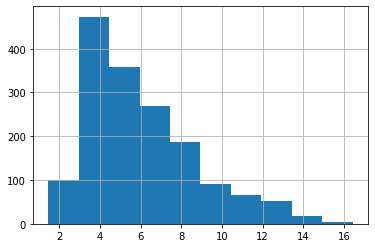

In [11]:
df['DM_age_diff_mean'].hist()

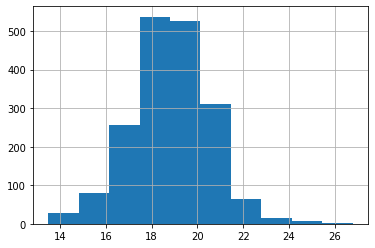

In [13]:
df['DM_age_marr_mean'].hist()

In [12]:
df_country[df_country['DM_age_diff_10plus_p']>25]

,country_name,year,region_num_harmonized,interview_year_mean,interview_month_mean,CMC_interview_mean,DM_age_mean,DM_age_mean_se,DM_age_15.19_p,DM_age_15.19_p_se,...,drought_spei03_n1_share36,drought_spei03_n1_share60,drought_spei03_n1.5_share12,drought_spei03_n1.5_share36,drought_spei03_n1.5_share60,drought_spei03_n2_share12,drought_spei03_n2_share36,drought_spei03_n2_share60,hdi,gdp_pc
2,Benin,2006.0,3.5,2006.0,9.0,1281.150,28.830,0.240,18.670,1.030,...,0.111111,0.141667,0.083333,0.027778,0.050000,0.0,0.000000,0.016667,0.422768,1644.910889
4,Burkina Faso,2006.5,7.0,2006.5,9.0,1286.320,29.020,0.330,19.840,1.425,...,0.277778,0.266667,0.083333,0.083333,0.066667,0.0,0.027778,0.016667,0.346692,1305.232117
7,Cameroon,2011.0,4.5,2011.0,5.0,1336.240,27.665,0.270,25.430,1.205,...,0.111111,0.125000,0.000000,0.027778,0.033333,0.0,0.000000,0.000000,0.475322,2596.145996
10,Cote d'Ivoire,2003.0,5.5,2002.5,7.5,1241.880,28.085,0.350,21.285,1.680,...,0.250000,0.250000,0.000000,0.083333,0.083333,0.0,0.000000,0.000000,0.420363,2785.813721
12,Ethiopia,2008.0,6.0,2000.0,7.0,1208.130,27.820,0.260,22.570,1.245,...,0.180556,0.183333,0.083333,0.027778,0.050000,0.0,0.000000,0.000000,0.346124,738.407959
13,Gabon,2006.0,3.0,2006.0,5.5,1278.740,28.140,0.265,24.740,1.260,...,0.083333,0.058333,0.000000,0.013889,0.033333,0.0,0.000000,0.000000,0.654484,17600.710938
16,Guinea,2012.0,4.5,2012.0,5.0,1352.130,29.110,0.330,21.750,1.325,...,0.277778,0.266667,0.083333,0.138889,0.133333,0.0,0.027778,0.016667,0.381602,1202.474915
24,Liberia,2010.0,4.0,2010.0,3.0,1322.870,29.390,0.320,19.155,1.170,...,0.013889,0.041667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.410391,758.367798
28,Mali,2006.0,4.0,2006.0,7.0,1279.240,28.760,0.270,19.450,1.220,...,0.222222,0.250000,0.083333,0.083333,0.100000,0.0,0.000000,0.016667,0.308708,1151.012817
29,Morocco,1997.5,3.5,1997.5,7.0,1177.235,29.200,0.220,21.570,0.965,...,0.180556,0.191667,0.083333,0.083333,0.075000,0.0,0.000000,0.008333,0.522991,3681.949707


In [ ]:
df.sort_values(by = 'DM_age_diff_10plus_p', ascending=False)

In [92]:
df_key_indicators = df[['country_name', 'year', 'DM_age_mean', 'DM_urban_p', 'DM_marr_p', 'DM_age_marr_mean','DM_age_diff_mean',
                       'DM_age_diff_10plus_p','HH_women_time_water_mean','HD_women_children_mean','ED_educ_years_mean',
                       'EI_women_elec_p','EI_women_tv_p','EI_women_radio_p','EI_women_fridge_p', 'EI_women_telephone_p',
                        'EI_women_modern_cooking_p','EI_mobile_p','DP_decide_money_p','DP_decide_health_p','DP_decide_large_purchase_p',
                        'DP_decide_visits_p','DP_decide_contraception_p', 'hdi'
                       ]]

In [115]:
#find the portion of missing data for each column
missing = df_key_indicators.isna().mean().to_frame().reset_index()
missing.sort_values(by = 0, ascending = False)

,index,0
17,EI_mobile_p,0.882096
22,DP_decide_contraception_p,0.878821
21,DP_decide_visits_p,0.721616
19,DP_decide_health_p,0.272926
20,DP_decide_large_purchase_p,0.270197
16,EI_women_modern_cooking_p,0.254913
18,DP_decide_money_p,0.249454
15,EI_women_telephone_p,0.156659
23,hdi,0.138646
6,DM_age_diff_mean,0.115721


In [116]:
#create a list of columns that have more than 25% missing
too_much_missing = missing[missing[0] >.25]['index'].to_list()
too_much_missing

['EI_women_modern_cooking_p',
 'EI_mobile_p',
 'DP_decide_health_p',
 'DP_decide_large_purchase_p',
 'DP_decide_visits_p',
 'DP_decide_contraception_p']

In [117]:
#drop the indicators with more than 25% missing
df_key_indicators1 = df_key_indicators.drop(too_much_missing, axis =1)

In [118]:
missing_hdi = df_key_indicators1[df_key_indicators1['hdi'].isna()]
missing_hdi.groupby('year').count()

,country_name,DM_age_mean,DM_urban_p,DM_marr_p,DM_age_marr_mean,DM_age_diff_mean,DM_age_diff_10plus_p,HH_women_time_water_mean,HD_women_children_mean,ED_educ_years_mean,EI_women_elec_p,EI_women_tv_p,EI_women_radio_p,EI_women_fridge_p,EI_women_telephone_p,DP_decide_money_p,hdi
year,,,,,,,,,,,,,,,,,
1992,5,5,5,5,5,0,0,5,5,5,5,5,5,5,0,0,0
1994,4,4,4,4,4,0,0,4,4,4,4,4,4,2,0,0,0
1995,4,4,4,4,4,0,0,4,4,4,4,4,4,4,4,0,0
1996,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1997,6,6,6,6,6,6,6,4,6,6,6,6,6,4,4,0,0
1998,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
2000,8,8,8,8,8,8,8,6,8,8,8,8,8,4,8,6,0
2003,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0
2004,6,6,6,6,6,6,6,4,6,6,6,6,6,4,6,6,0


In [119]:
#drop 2016, 2017, 2018, 2019
df_key_indicators1 = df_key_indicators1[(df_key_indicators1.year < 2016)]
df_key_indicators1.describe()

missing_hdi = df_key_indicators1[df_key_indicators1['hdi'].isna()]
missing_hdi.groupby('country_name').count()

,year,DM_age_mean,DM_urban_p,DM_marr_p,DM_age_marr_mean,DM_age_diff_mean,DM_age_diff_10plus_p,HH_women_time_water_mean,HD_women_children_mean,ED_educ_years_mean,EI_women_elec_p,EI_women_tv_p,EI_women_radio_p,EI_women_fridge_p,EI_women_telephone_p,DP_decide_money_p,hdi
country_name,,,,,,,,,,,,,,,,,
Bangladesh,14,14,14,14,14,12,12,6,14,14,14,14,14,6,10,8,0
Burundi,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
Cote d'Ivoire,4,4,4,4,4,2,2,4,4,4,4,4,4,4,2,2,0
Ethiopia,6,6,6,6,6,6,6,6,6,6,6,6,6,4,6,6,0
Madagascar,16,16,16,16,16,12,12,16,16,16,16,16,16,16,12,8,0
Maldives,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
Morocco,2,2,2,2,2,1,1,1,2,2,2,2,2,2,1,1,0
Peru,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
South Africa,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [150]:
df_key_indicators1.sort_values(by=['country_name', 'year'])

#assuming that the new values are similar to the previous year's
df_key_indicators1_filled = df_key_indicators1.fillna(method = 'ffill')
df_key_indicators1_filled.head()

,country_name,year,DM_age_mean,DM_urban_p,DM_marr_p,DM_age_marr_mean,DM_age_diff_mean,DM_age_diff_10plus_p,HH_women_time_water_mean,HD_women_children_mean,ED_educ_years_mean,EI_women_elec_p,EI_women_tv_p,EI_women_radio_p,EI_women_fridge_p,EI_women_telephone_p,DP_decide_money_p,hdi
0,Armenia,2000,30.71,24.38,69.21,19.99,4.60,14.55,18.90,0.67,10.85,99.79,85.80,35.70,66.39,34.03,28.00,0.644083
1,Armenia,2000,30.38,19.86,70.04,19.23,4.65,10.96,35.19,0.57,10.97,99.64,95.37,44.21,86.81,56.51,30.91,0.644127
2,Armenia,2000,31.10,28.69,67.47,19.68,4.07,14.52,18.88,0.54,10.63,99.39,90.00,22.04,75.10,42.86,32.81,0.644415
3,Armenia,2000,30.65,30.67,70.55,18.83,4.68,21.43,39.06,0.51,10.51,98.77,88.52,21.93,62.91,54.30,9.62,0.643942
4,Armenia,2000,31.57,53.55,66.01,20.42,4.27,16.67,28.13,0.43,11.17,98.73,86.08,20.25,64.56,45.57,35.29,0.645256


In [151]:
df_key_indicators1_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1648 entries, 0 to 1831
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_name              1648 non-null   object 
 1   year                      1648 non-null   int64  
 2   DM_age_mean               1648 non-null   float64
 3   DM_urban_p                1648 non-null   float64
 4   DM_marr_p                 1648 non-null   float64
 5   DM_age_marr_mean          1648 non-null   float64
 6   DM_age_diff_mean          1648 non-null   float64
 7   DM_age_diff_10plus_p      1648 non-null   float64
 8   HH_women_time_water_mean  1648 non-null   float64
 9   HD_women_children_mean    1648 non-null   float64
 10  ED_educ_years_mean        1648 non-null   float64
 11  EI_women_elec_p           1648 non-null   float64
 12  EI_women_tv_p             1648 non-null   float64
 13  EI_women_radio_p          1648 non-null   float64
 14  EI_women

In [152]:
def my_heatmap(df, title):
    plt.figure(figsize=(16, 6))
    sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
    plt.title(title, fontsize =20)

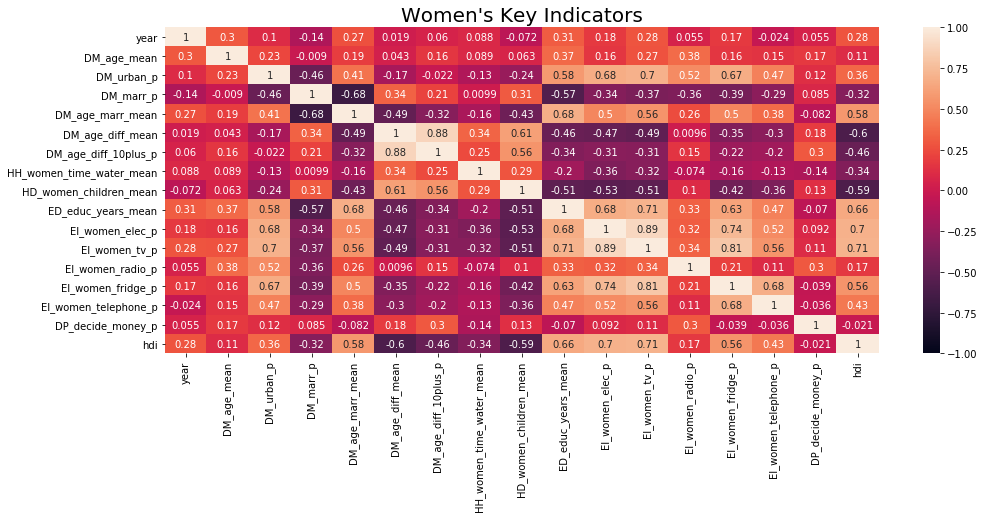

In [153]:
my_heatmap(df_key_indicators1_filled, "Women's Key Indicators")

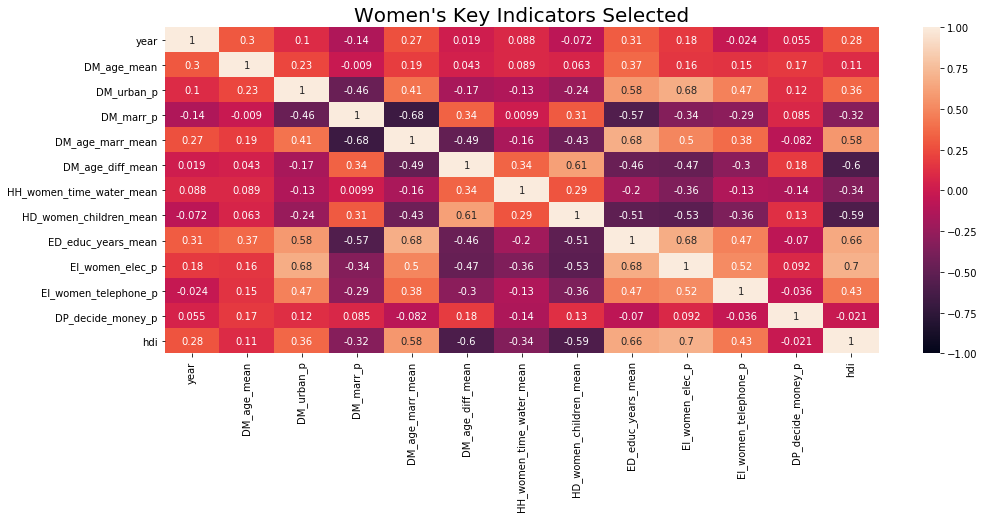

In [155]:
#drop the variables with strong correlations
df_key_indicators_trim = df_key_indicators1_filled.drop(['EI_women_tv_p','EI_women_radio_p','EI_women_fridge_p','DM_age_diff_10plus_p'], axis=1)
#show the correlation matrix
my_heatmap(df_key_indicators_trim, "Women's Key Indicators Selected")

In [162]:
X = df_key_indicators_trim.drop(['hdi', 'country_name', 'year'], axis=1)
y = df_key_indicators_trim['hdi']
X.head()

,DM_age_mean,DM_urban_p,DM_marr_p,DM_age_marr_mean,DM_age_diff_mean,HH_women_time_water_mean,HD_women_children_mean,ED_educ_years_mean,EI_women_elec_p,EI_women_telephone_p,DP_decide_money_p
0,30.71,24.38,69.21,19.99,4.60,18.90,0.67,10.85,99.79,34.03,28.00
1,30.38,19.86,70.04,19.23,4.65,35.19,0.57,10.97,99.64,56.51,30.91
2,31.10,28.69,67.47,19.68,4.07,18.88,0.54,10.63,99.39,42.86,32.81
3,30.65,30.67,70.55,18.83,4.68,39.06,0.51,10.51,98.77,54.30,9.62
4,31.57,53.55,66.01,20.42,4.27,28.13,0.43,11.17,98.73,45.57,35.29


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 42)

In [167]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
print(regr.score(X_test, y_test))

0.649020940173286


So about 65% of the variation of hdi can be attributed to the model. But what is the most influential indicator, and what is the least? 

If we return to the correlations, we see that age difference between partners and number of children at home are very strongly negatively correlated with hdi. Years of education is strongly correlated, but that is not surprising given that expected years of education is factored into hdi. As a result, education should probably be removed from the model. 
But more generally, this in interesting in light of recent news about low birthrates and declining populations. The fewer children at home, the higher hdi. So does it go the other way? Are children bad for hdi? Some of this is a statistical 

Next steps: download the hdi dataset and birthrate dataset. 